In [1]:
# Standard DS imports
import numpy as np
import pandas as pd

# dataset
from pydataset import data

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from scipy import stats

# db_connection
import acquire

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [2]:
# Create dataframe for iris data
df_iris = data('iris')

In [3]:
# print the first 3 rows
print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [4]:
#print the number of rows and columns (shape)
print(df_iris.shape[0],df_iris.shape[1])

150 5


In [5]:
#print the column names
[print(col) for col in df_iris.columns]

Sepal.Length
Sepal.Width
Petal.Length
Petal.Width
Species


[None, None, None, None, None]

In [6]:
# print the data type of each column
[print(col, '- datatype: ', df_iris[col].dtype) for col in df_iris.columns]

Sepal.Length - datatype:  float64
Sepal.Width - datatype:  float64
Petal.Length - datatype:  float64
Petal.Width - datatype:  float64
Species - datatype:  object


[None, None, None, None, None]

In [7]:
# print the summary statistics for each of the numeric variables
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5. Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [8]:
# Read data from Google Sheet:

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [9]:
# Use pd.read_csv to create dataframe from the csv exported from google doc
df_google = pd.read_csv(csv_export_url)

In [10]:
# print the first 3 rows
print(df_google.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [11]:
# print the number of rows and columns
print(df_google.shape)

(891, 12)


In [12]:
# print the column names
print(df_google.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
# print the data type of each column
print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [14]:
# print the summary statistics for each of the numeric variables
print(df_google.describe(include=np.number))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [15]:
# download file to excel
df_google.to_excel("df_excel.xlsx")

In [16]:
# Read into dataframe from excel
df_excel = pd.read_excel("df_excel.xlsx", index_col=0)

In [17]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)

In [18]:
# print the number of rows of your original dataframe
print(len(df_excel))

891


In [19]:
# print the first 5 column names
print(df_excel.columns[0:5])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')


In [20]:
# print the column names that have a data type of object
[print(col) for col in df_excel.select_dtypes(include=['object'])]

Name
Sex
Ticket
Cabin
Embarked


[None, None, None, None, None]

In [21]:
# compute the range for each of the numeric variables.
range_list = [()]
for col in df_excel.select_dtypes(include=np.number):
    range_list.append((min(df_excel[col]), max(df_excel[col])))
range_list[1:]

[(1, 891), (0, 1), (1, 3), (0.42, 80.0), (0, 8), (0, 6), (0.0, 512.3292)]

# Data Preperation: Exercises

In [22]:
from sklearn.model_selection import train_test_split

### Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.
2. Drop the species_id and measurement_id columns.
3. Rename the species_name column to just species.
4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [23]:
# Use the function defined in acquire.py to load the iris data.
df = acquire.get_iris_data('iris_db')

In [24]:
# Drop duplicate columns
df = df.drop_duplicates()

In [25]:
# Drop the species_id and measurement_id columns
df = df.drop(columns=['species_id', 'measurement_id'])
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_name'],
      dtype='object')

In [26]:
# Rename the species_name column to just species
df = df.rename(columns={'species_name': 'species'})

In [27]:
# Create dummy variables of the species name
dummy_df = pd.get_dummies(df[['species']], drop_first=True, dtype=int)

In [28]:
# Concat dummy_df onto our dataframe
df_iris = pd.concat([df, dummy_df], axis=1)

In [29]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'],
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['species_id', 'measurement_id'])
    df = df.rename(columns={'species_name': 'species'})
    dummy_df = pd.get_dummies(df[['species']], drop_first=True, dtype=int)
    df_iris = pd.concat([df, dummy_df], axis=1)
    return df_iris


In [30]:
fresh_iris = acquire.get_iris_data('iris_db')

In [31]:
prep_iris(fresh_iris)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


### Using the Titanic dataset:

1. Use the function defined in acquire.py to load the Titanic data.
2. Drop any unnecessary, unhelpful, or duplicated columns.
3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [32]:
df_titanic = acquire.get_titanic_data('titanic_db')

In [33]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [34]:
df_titanic = df_titanic.drop_duplicates()

In [35]:
df_titanic = df_titanic.drop(columns=['class', 'deck', 'embarked', 'age'])

In [36]:
dummy_df = pd.get_dummies(df_titanic[['sex','embark_town']], drop_first=True, dtype=int)

In [37]:
df_titanic = pd.concat([df_titanic, dummy_df], axis=1)

In [38]:
df_titanic

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [39]:
def prep_titanic(df_titanic):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'],
    and create dummy vars from sex and embark_town. 
    '''
    df_titanic = df_titanic.drop_duplicates()
    df_titanic = df_titanic.drop(columns=['deck', 'embarked', 'class', 'age'])
    dummy_df = pd.get_dummies(df_titanic[['sex', 'embark_town']], drop_first=True, dtype=int)
    df_titanic = pd.concat([df_titanic, dummy_df], axis=1)
    return df_titanic


In [40]:
fresh_titanic = acquire.get_titanic_data('titanic_db')

In [41]:
prep_titanic(fresh_titanic)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


### Using the Telco dataset:

1. Use the function defined in acquire.py to load the Telco data.
2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.
3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [42]:
df_telco = acquire.get_telco_data('telco_churn')

In [43]:
df_telco = df_telco.drop_duplicates()

In [44]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

In [45]:
# columns to drop: internet_service_type_id, payment_type_id, contract_type_id. 
df_telco = df_telco.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id'])

In [46]:
# Create dummy variables for binary categorical variables my mapping string value to 1 and 0.
df_telco['gender_encoded'] = df_telco.gender.map({'Female': 1, 'Male':0})
df_telco['partner_encoded'] = df_telco.partner.map({'Yes':1, 'No':0})
df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes':1, 'No':0})
df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes':1, 'No':0})
df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes':1, 'No':0})
df_telco['churn_encoded'] = df_telco.churn.map({'Yes':1, 'No':0})

In [47]:
# Create dummy variables for categorical variables with more than 2 values
dummy_df = pd.get_dummies(df_telco[['multiple_lines',
                                 'online_security',
                                 'online_backup',
                                 'device_protection', 
                                 'tech_support',
                                 'streaming_tv',
                                 'streaming_movies', 
                                 'contract_type', 
                                 'internet_service_type',
                                 'payment_type']],
                              drop_first=True)

In [48]:
df_telco = pd.concat([df_telco, dummy_df], axis=1)

In [49]:
df_telco.total_charges = df_telco.total_charges.str.replace(' ', '0').astype(float)

In [50]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech_supp

In [51]:
def prep_telco(df_telco):
    '''
    This function will drop any duplicate observations, 
    drop ['contract_type_id', 'payment_type_id', 'internet_service_type_id'], create dummy vars from all categorical variables, and change dtype of total_charges to float. 
    '''
    df_telco = df_telco.drop_duplicates()
    df_telco = df_telco.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id'])

    df_telco['gender_encoded'] = df_telco.gender.map({'Female': 1, 'Male':0})
    df_telco['partner_encoded'] = df_telco.partner.map({'Yes':1, 'No':0})
    df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes':1, 'No':0})
    df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes':1, 'No':0})
    df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes':1, 'No':0})
    df_telco['churn_encoded'] = df_telco.churn.map({'Yes':1, 'No':0})

    dummy_df = pd.get_dummies(df_telco[['multiple_lines',
                                     'online_security',
                                     'online_backup',
                                     'device_protection', 
                                     'tech_support',
                                     'streaming_tv',
                                     'streaming_movies', 
                                     'contract_type', 
                                     'internet_service_type',
                                     'payment_type']],
                                  drop_first=True)

    df_telco['total_charges'] = df_telco.total_charges.str.replace(' ', '0').astype(float)

    df_telco = pd.concat([df_telco, dummy_df], axis=1)
    
    return df_telco

In [52]:
fresh_telco = acquire.get_telco_data('telco_churn')

In [53]:
prep_telco(fresh_telco)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,False,True,False,False,True,False,False,False,False,True
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,False,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,False,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,False,True,False,True,False,False,True,False,True,False
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,False,False,False,False,True,False,False,False,False,True
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,False,False,False,True,False,False,True,False,True,False
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,False,False,False,False,False,False,False,False,False,True
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,False,False,False,True,False,True,False,False,False,True


### Split your data:

1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.
3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [54]:
def split_function(df, target_varible):
    train, test = train_test_split(df,
                                   random_state=123,
                                   test_size=.20,
                                   stratify= df[target_varible])
    
    train, validate = train_test_split(train,
                                   random_state=123,
                                   test_size=.25,
                                   stratify= train[target_varible])
    return train, validate, test

In [55]:
train_iris, validate_iris, test_iris = split_function(df_iris, 'species')

In [56]:
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


In [57]:
train_titanic, validate_titanic, test_titanic = split_function(df_titanic, 'survived')

In [58]:
print(f'Prepared df: {df_titanic.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [59]:
train_telco, validate_telco, test_telco = split_function(df_telco, 'churn')

In [60]:
print(f'Prepared df: {df_telco.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Prepared df: (7043, 47)

Train: (4225, 47)
Validate: (1409, 47)
Test: (1409, 47)


# Exploratory Analysis: Exercises

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [61]:
# Acquire:
iris = acquire.get_iris_data('iris_db')

In [62]:
# Prepare:
iris = prep_iris(iris)

In [63]:
# Split
train_iris, validate_iris, test_iris = split_function(iris, 'species')

#### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [64]:
# split possible independent features from dependent variable:
x_train, y_train = \
train_iris.drop(columns='species'), \
train_iris[['species']]

In [65]:
# Separate categorical and numeric columns:
# Initialize two empty lists for each
cat_cols, num_cols = [], []
# set up a for loop to fill lists
explore_columns = x_train.columns.to_list()
for col in explore_columns:
    if train_iris[col].dtype == '0':
        cat_cols.append(col)
    else:
        if train_iris[col].nunique() < 3:
            cat_cols.append(col)
        else:
            num_cols.append(col)


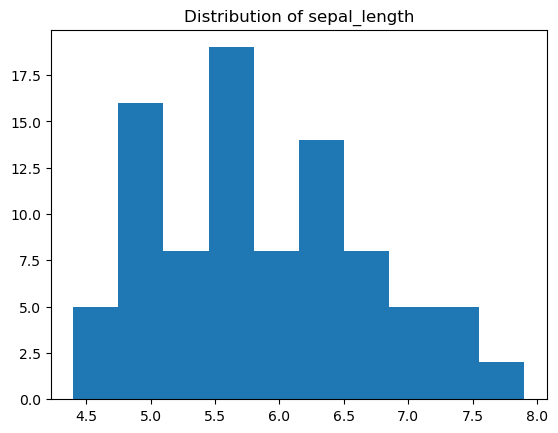

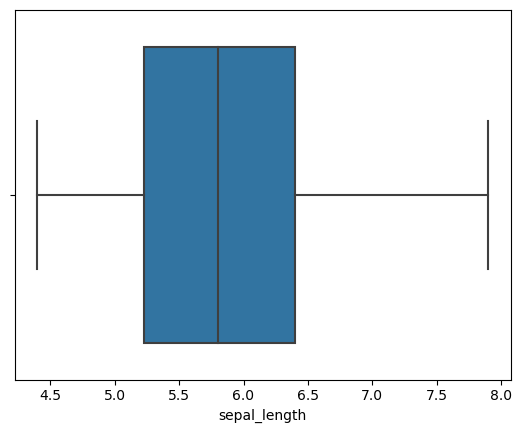

~~~~~~~~~~~~


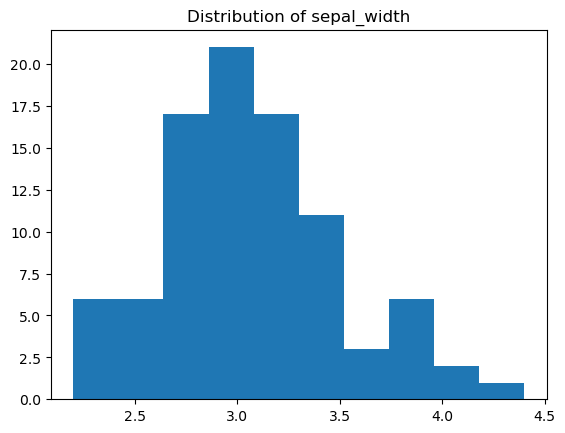

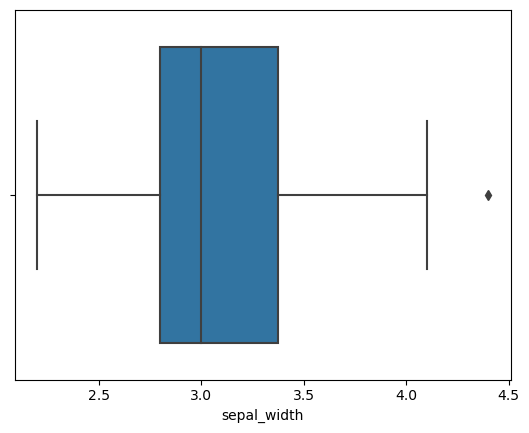

~~~~~~~~~~~~


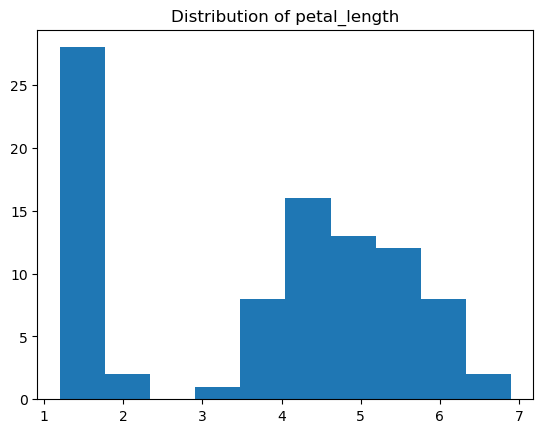

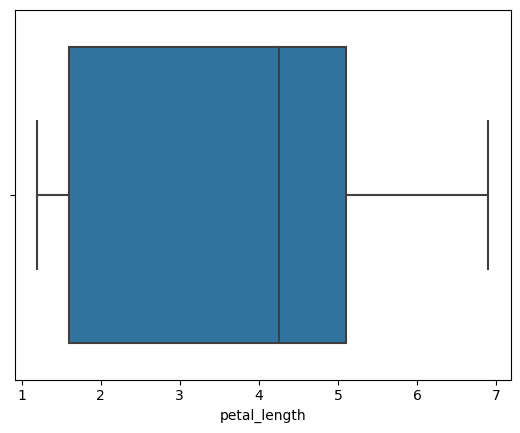

~~~~~~~~~~~~


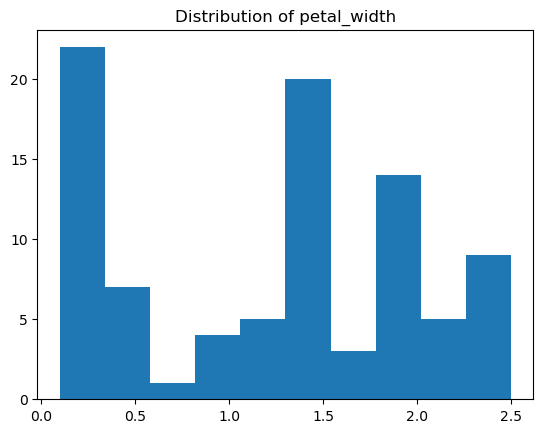

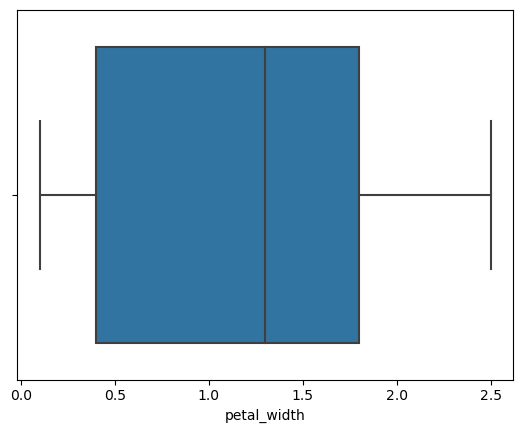

~~~~~~~~~~~~


,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.875556,3.070000,3.782222,1.203333
std,0.792282,0.436135,1.742114,0.755422
min,4.400000,2.200000,1.200000,0.100000
25%,5.225000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [125]:
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

dropped_encoded = train_iris.drop(columns=['species_virginica', 'species_versicolor'])

for col in num_cols:
    plt.hist(train_iris[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data=train_iris, x=col)
    plt.show()
    print('~~~~~~~~~~~~')
dropped_encoded.describe()


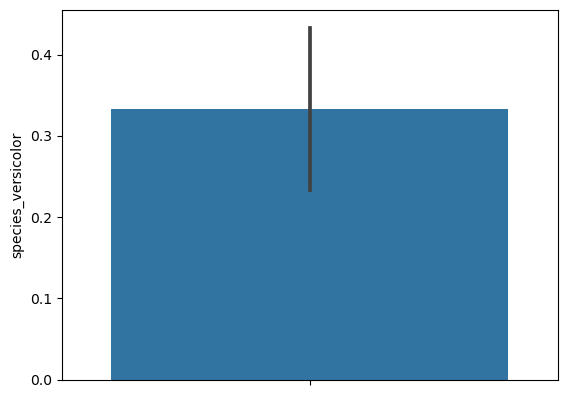

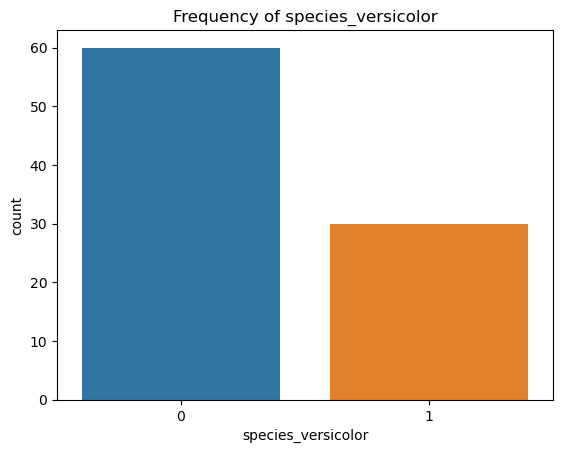

~~~~~~~~~~~~


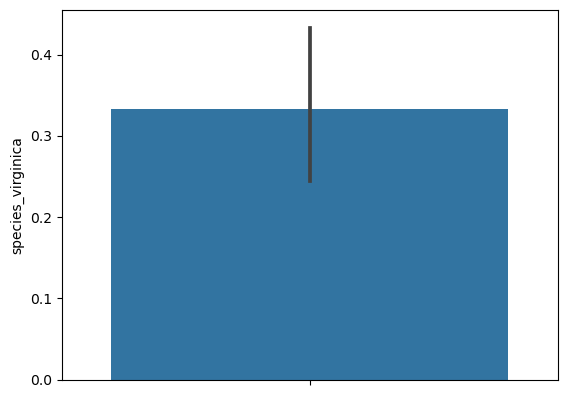

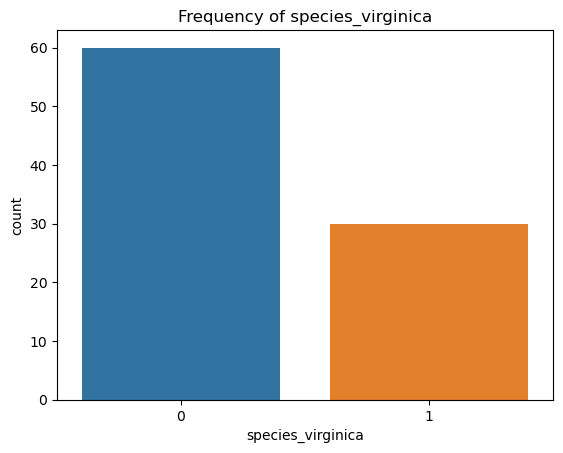

~~~~~~~~~~~~


In [67]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
for col in cat_cols:
    sns.barplot(data=x_train, y=col)
    plt.show()
    sns.countplot(data=train_iris, x=col)
    plt.title(f'Frequency of {col}')
    plt.show()
    print('~~~~~~~~~~~~')

#### Takeaways: 
- Quantitative Variables: There a very few outliers in our quantitative variables, only sepal_width had an outlier. petal_width had the most variation relative to its mean, while sepal_length had the least variation relative to its mean. Both petal measurements had more variation relative to their means than the sepal measurements. Because of this I suspect that our petal measurements will be most predictive of our target.

- Categorical Variables: Our Categorical variables are the encoded variables for species. Because we stratified our split on species these have uniform distribution, with 30 count each. There is nothing more we can say at this time.

#### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

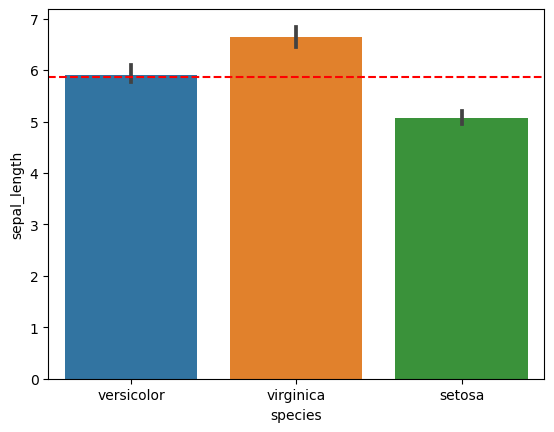

~~~~~~~~~~~~


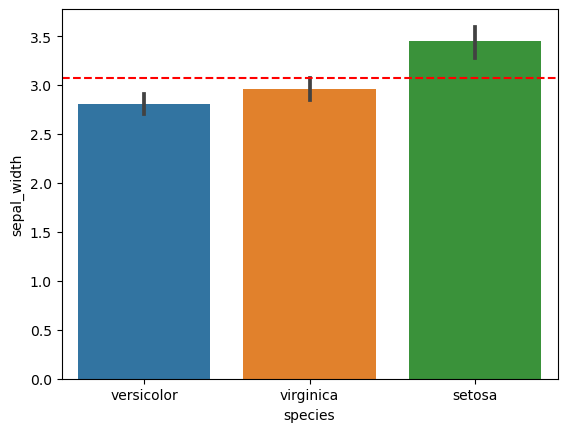

~~~~~~~~~~~~


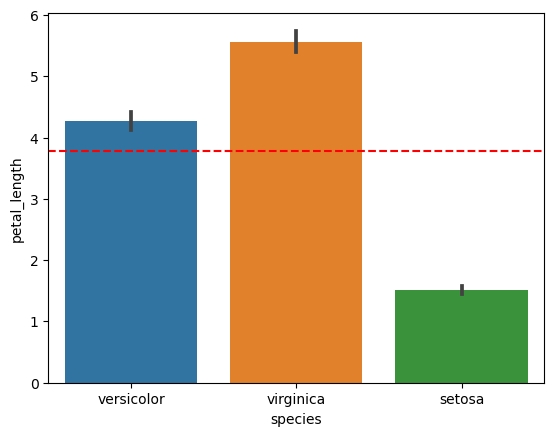

~~~~~~~~~~~~


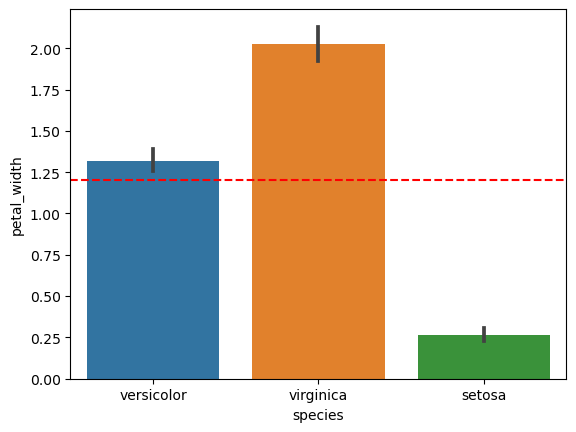

~~~~~~~~~~~~


In [68]:
# - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

overall_mean = train_iris['sepal_length'].mean()
sns.barplot(
    data=train_iris,
    x='species',
    y='sepal_length')
plt.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')
plt.show()
print('~~~~~~~~~~~~')

overall_mean = train_iris['sepal_width'].mean()
sns.barplot(
    data=train_iris,
    x='species',
    y='sepal_width')
plt.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')
plt.show()
print('~~~~~~~~~~~~')

overall_mean = train_iris['petal_length'].mean()
sns.barplot(
    data=train_iris,
    x='species',
    y='petal_length')
plt.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')
plt.show()
print('~~~~~~~~~~~~')

overall_mean = train_iris['petal_width'].mean()
sns.barplot(
    data=train_iris,
    x='species',
    y='petal_width')
plt.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')
plt.show()
print('~~~~~~~~~~~~')

In [132]:
# For each measurement type, compute the descriptive statistics for each species.
print('Versicolor')
print(dropped_encoded[dropped_encoded.species == 'versicolor'].describe())
print('~~~~~~~~~')
print('Viriginica')
print(dropped_encoded[dropped_encoded.species == 'virginica'].describe())
print('~~~~~~~~~')
print('Setosa')
print(dropped_encoded[dropped_encoded.species == 'setosa'].describe())
print('~~~~~~~~~')

Versicolor
       sepal_length  sepal_width  petal_length  petal_width
count      30.00000    30.000000     30.000000    30.000000
mean        5.91000     2.806667      4.273333     1.320000
std         0.47659     0.281539      0.409317     0.193694
min         4.90000     2.300000      3.300000     1.000000
25%         5.60000     2.625000      4.000000     1.200000
50%         5.80000     2.800000      4.250000     1.300000
75%         6.17500     3.000000      4.575000     1.475000
max         7.00000     3.400000      5.100000     1.800000
~~~~~~~~~
Viriginica
       sepal_length  sepal_width  petal_length  petal_width
count     30.000000    30.000000     30.000000    30.000000
mean       6.646667     2.956667      5.563333     2.023333
std        0.533520     0.309263      0.492344     0.286095
min        5.800000     2.200000      4.800000     1.500000
25%        6.300000     2.800000      5.125000     1.800000
50%        6.500000     3.000000      5.550000     2.000000
75%     

In [101]:
# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
# H0: There is no difference in means of petal_width between the virginica & versicolor species.
# Ha: There is a difference in means of petal_width between the viriginica & versicolor species.
alpha = 0.05
petal_width_versicolor = train_iris[train_iris.species == 'versicolor'].petal_width
petal_width_virginica = train_iris[train_iris.species == 'virginica'].petal_width

test_stat, p = stats.mannwhitneyu(petal_width_versicolor, petal_width_virginica)
if p < 0.05:
    print('we reject the null hypothesis')

we reject the null hypothesis


In [102]:
# H0: There is no difference in means of petal_length between the virginica & versicolor species.
# Ha: There is a difference in means of petal_length between the viriginica & versicolor species.
alpha = 0.05
petal_length_versicolor = train_iris[train_iris.species == 'versicolor'].petal_length
petal_length_virginica = train_iris[train_iris.species == 'virginica'].petal_length

test_stat, p = stats.mannwhitneyu(petal_length_versicolor, petal_length_virginica)
if p < 0.05:
    print('we reject the null hypothesis')

we reject the null hypothesis


In [103]:
# H0: There is no difference in means of sepal_length between the virginica & versicolor species.
# Ha: There is a difference in means of sepal_length between the viriginica & versicolor species.
alpha = 0.05
sepal_length_versicolor = train_iris[train_iris.species == 'versicolor'].sepal_length
sepal_length_virginica = train_iris[train_iris.species == 'virginica'].sepal_length

test_stat, p = stats.mannwhitneyu(sepal_length_versicolor, sepal_length_virginica)
if p < 0.05:
    print('we reject the null hypothesis')

we reject the null hypothesis


In [105]:
# H0: There is no difference in means of sepal_width between the virginica & versicolor species.
# Ha: There is a difference in means of sepal_width between the viriginica & versicolor species.
alpha = 0.05
sepal_width_versicolor = train_iris[train_iris.species == 'versicolor'].sepal_width
sepal_width_virginica = train_iris[train_iris.species == 'virginica'].sepal_width

test_stat, p = stats.mannwhitneyu(sepal_width_versicolor, sepal_width_virginica)
if p < 0.05:
    print('we reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


#### Takeaways: 
- The sepal measures for each species are somewhat similar, however there petal measures have much more variation between species, especially for the setosa species.

- There was no difference in means found between virginica and versicolor for sepal_width. We found a difference in means betwen virginica and versicolor for all other measures.

#### 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

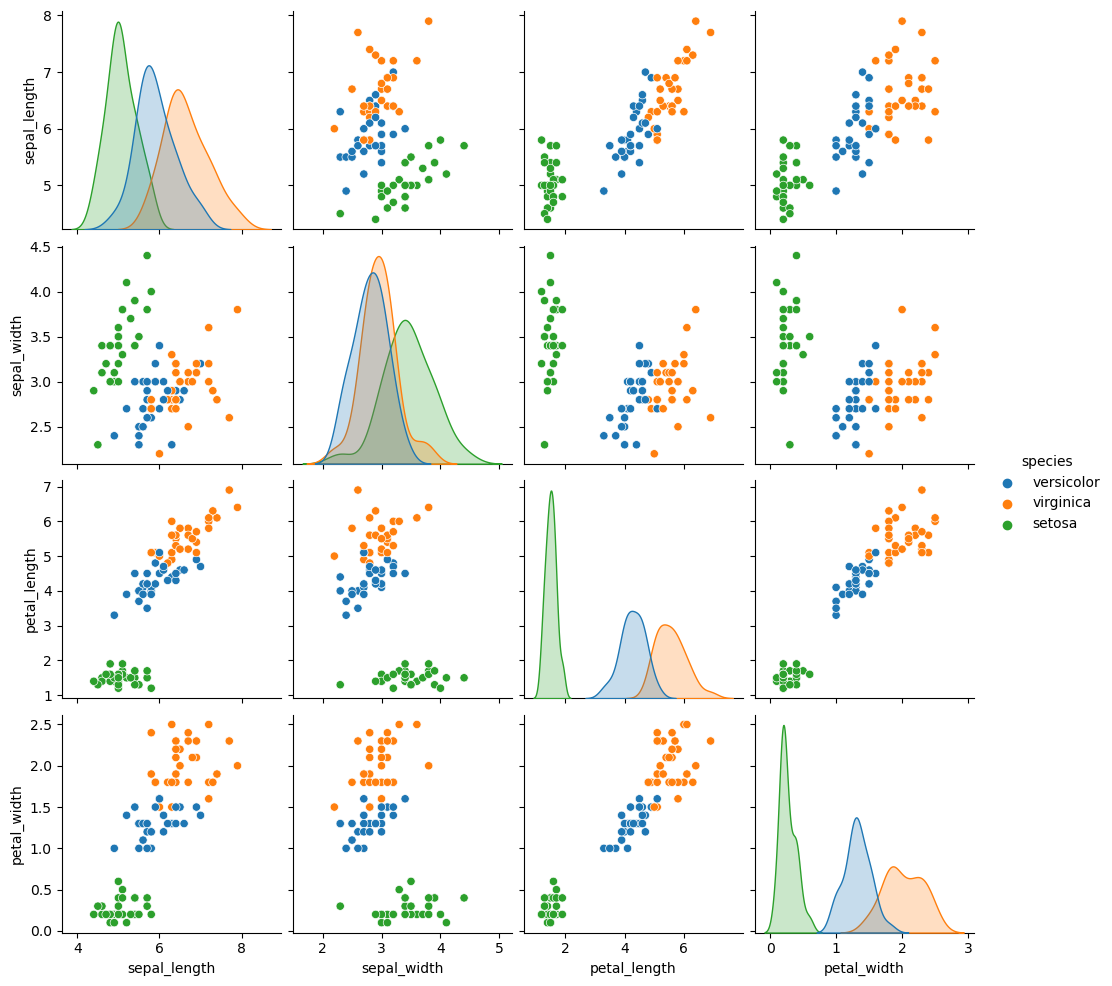

In [109]:
# Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
sns.pairplot(
    data=train_iris,
    vars=('sepal_length', 'sepal_width', 'petal_length', 'petal_width'),
    hue='species'
)

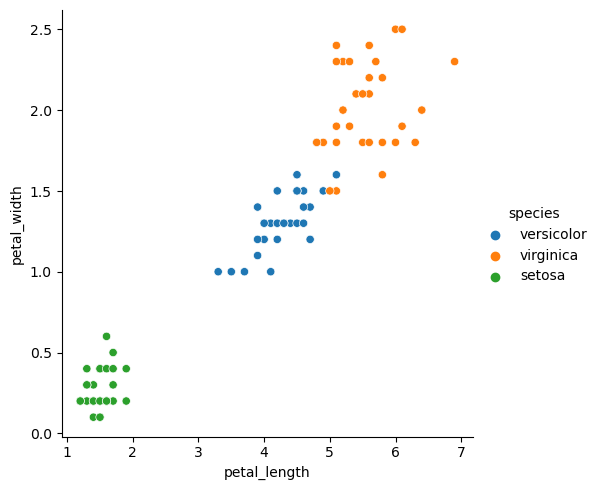

In [111]:
# Visualize two numeric variables of the species. Hint: sns.relplot with hue or col
sns.relplot(
    data=train_iris,
    x=train_iris.petal_length,
    y=train_iris.petal_width,
    hue='species'
)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


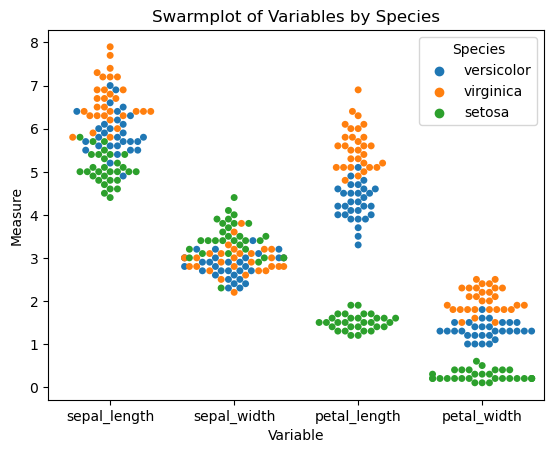

In [138]:
# Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
melted_df = pd.melt(dropped_encoded, id_vars=['species'], var_name='variable_name', value_name='measure')
sns.swarmplot(
    data=melted_df,
    x='variable_name',
    y='measure',
    hue='species')
plt.title('Swarmplot of Variables by Species')
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.legend(title='Species')

plt.show()


In [139]:
# Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

# Is sepal_length significantly different between versicolor and virginica?
# H0: There is no difference in means of sepal_length between versicolor and virginica species.
# Ha: There is a difference in the means of sepal_length between versicolor and virginica species.
alpha = 0.05

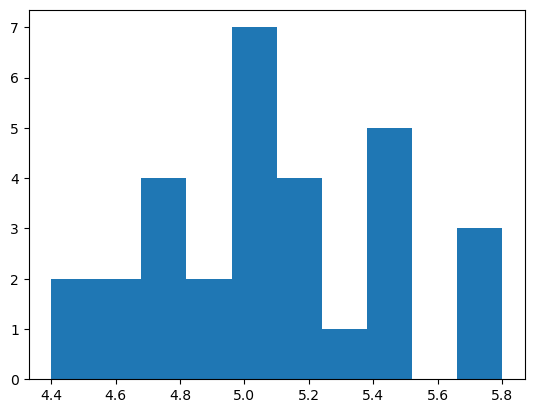

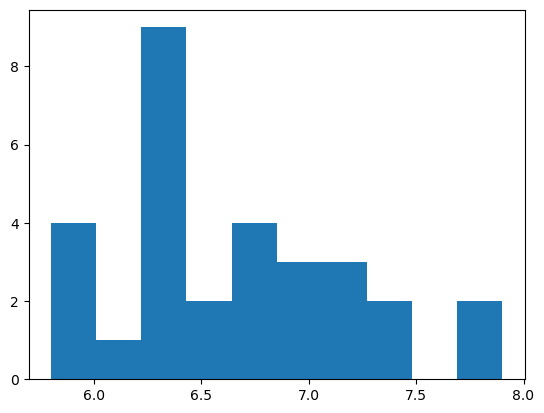

In [144]:
# Let's check our assumptions to see if a 2 sample, 2 tailed t-test is appropriate.
# Normality:
plt.hist(train_iris[train_iris.species == 'setosa'].sepal_length)
plt.show()
plt.hist(train_iris[train_iris.species == 'virginica'].sepal_length)
plt.show()
# We have 30 observations for each. The distribution of for setosa and virginica do not look approximately normal. We will go ahead with a non parametric test: Mannwhitneyu


In [147]:
# H0: There is no difference in means of sepal_length between setosa and virginica species.
# Ha: There is a difference in the means of sepal_length between setosa and virginica species.
sepal_length_setosa = train_iris[train_iris.species == 'setosa'].sepal_length
sepal_length_versicolor = train_iris[train_iris.species == 'versicolor'].sepal_length

test_stat, p = stats.mannwhitneyu(sepal_length_setosa, sepal_length_versicolor)
if p < 0.05:
    print('we reject the null hypothesis')

we reject the null hypothesis


#### Takeaways: 
- Visually, there looks to be separation between species for all variables except possibly sepal_width. This supports our earlier failure to reject the null that there was a difference in means of sepal_width between virginica and versicolor.

- Our alternative hypothesis that there was a difference in sepal_length between setosa and versicolor was supported. This is in contrast to our earlier failure to reject the null between versicolor and virginica.

### Part II: Explore your titanic dataset more completely.

- Determine drivers of the target variable

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

### Part III:
- Explore your telco data to discover drivers of churn

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

In [186]:
# Acquire:
telco = acquire.get_telco_data('telco_churn')

In [187]:
# Prepare:
telco = prep_telco(telco)

# Fill null values of internet_service_type with "No internet service"
telco['internet_service_type'].fillna("No Internet Service", inplace=True)


In [188]:
# Split:
train_telco, validate_telco, test_telco= split_function(telco, 'churn')

####  Univariate Stats

In [189]:
# split possible independent features from dependent variable:
x_train, y_train = \
train_telco.drop(columns='churn'), \
train_telco[['churn']]

In [195]:
# Separate categorical and numeric columns:
# For our EDA we will drop the encoded columns
cat_cols = ['gender','senior_citizen','partner','dependents','phone_service','paperless_billing','internet_service_type','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','contract_type','payment_type']

num_cols = ['tenure', 'monthly_charges','total_charges']

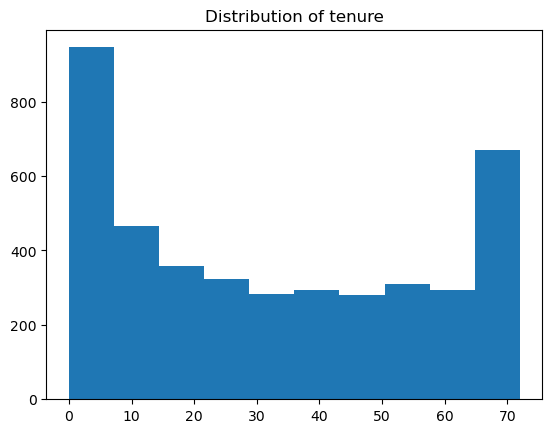

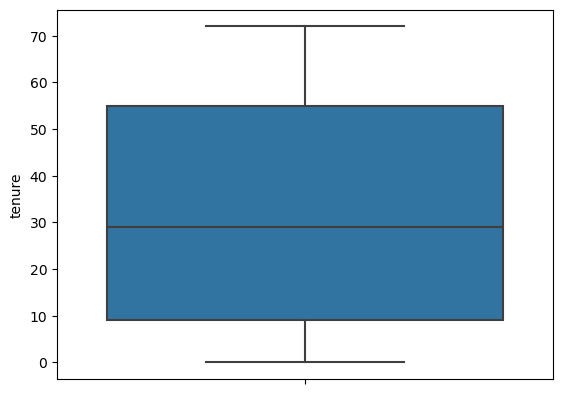

~~~~~~~~~~~~


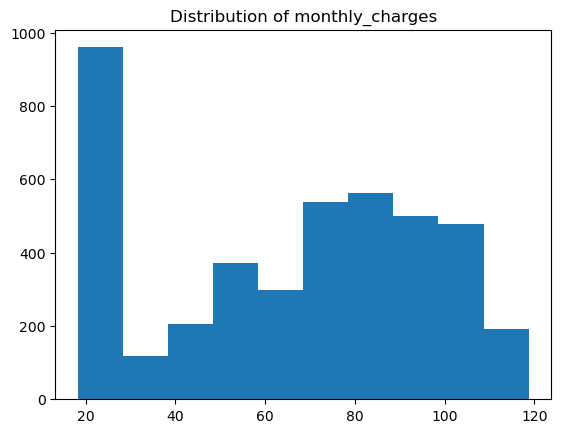

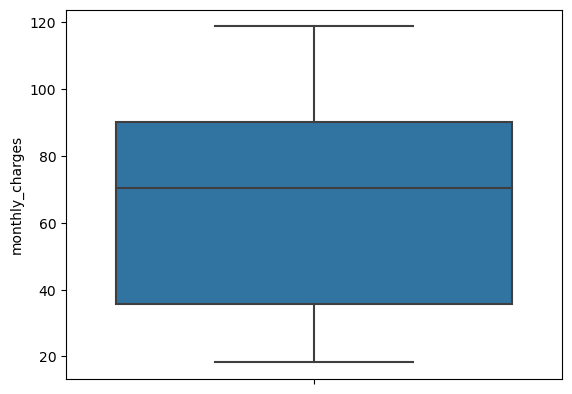

~~~~~~~~~~~~


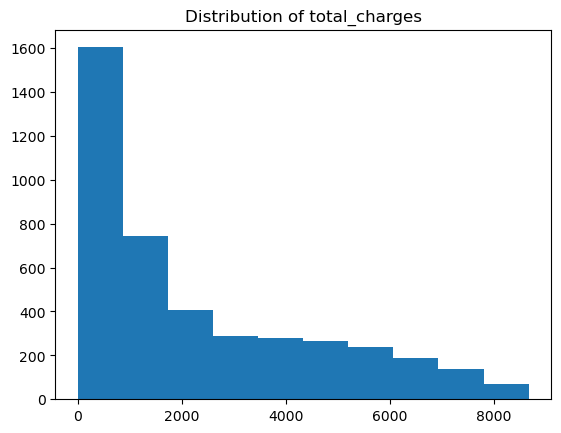

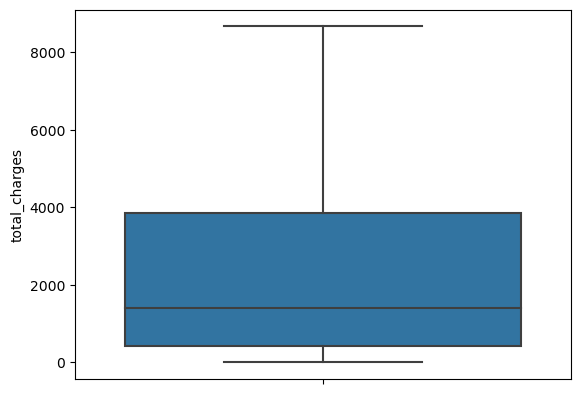

~~~~~~~~~~~~


In [203]:
for col in num_cols:
    plt.hist(train_telco[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data=train_telco, y=col)
    plt.show()
    print('~~~~~~~~~~~~')
